# Speed Dating

## Contents

1) Initial exploration of the dataset
2) Principal 
3) Testing underlying assumptions

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#pd.set_option('display.max_columns', None, "display.max_rows", None)
pd.set_option("max_seq_items", None)
pd.set_option('display.max_rows', None, 'display.max_columns', None)


In [7]:
df = pd.read_csv("data\speed_dating_data.csv", encoding = "ISO-8859-1")


## General exploration of the dataset

In [9]:
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,7.662488,2.757186,3.784793,3.651645,2

As there are a lot of columns in the dataset, I printed out the names of columns to get an overview of the features of the dataset.

In [13]:
print(df.columns)

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace',
       'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun',
       'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o',
       'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field',
       'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace',
       'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out',
       'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1',
       'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1',
       'amb2_1', 'shar2_1', 'attr3_1', 'si

Let's check whether there are missing values in the dataset if any.

In [9]:

df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

## Exploring the participants in the dataset

Each participant in the study had a unique number ("iid"). The original dataset contains several rows for each iid, each row corresponding to a different partner that the person with the given iid met during speed datint. 

I grouped the dataset by the iid in order to count the number of unique participants in the study.

In [12]:
df_by_iid = df.groupby("iid").mean(numeric_only=True).reset_index(drop=False)

print(f"Total number of participants in this study: {len(df_by_iid)}")

Total number of participants in this study: 551


In the dataset, the column "gender" contains information whether the participant was male (1) or female (0). To avoid confusion, I chose to create a column "gender_name" where the gender of each participant is indicated explicitly as "Male" or "Female".

In [19]:
df_by_iid["gender_name"] = df_by_iid['gender'].apply(lambda x: "Male" if x==1 else "Female")



TypeError: 'DataFrame' object is not callable

Each iid corresponds to a unique participant. I used the dataset grouped by iid to count the number of unique values in column "iid" to determine the total number of participants. I also used the dataset to count the number of men and women who participated in the study.

In [28]:
nb_participants = dating_per_person["iid"].nunique()
nb_participants_per_gender = dating_per_person["gender_name"].value_counts()
#print(nb_participants_per_gender)
#type(nb_participants_per_gender)
nb_females = nb_participants_per_gender[0]
nb_males = nb_participants_per_gender[1]
#print(nb_females)
#print(nb_males)
print(f"There were {nb_participants} participants in the study.")
print(f"There were {nb_females} female participants and {nb_males} male participants in the study.")

There were 551 participants in the study
There were 404 female participants and 147 male participants in the study.


Let's look at the age characteristics of the participants.
Having checked for missing values before, we know that age is not indicated for 8 participants. 
Before we decide of the method to impute the missing values for age (if any), let's count the mean age for all participants. 
DataFrame.mean() method gets the mean value of a particular column. This method ignores NaN/null values while calculating mean. The results of calculations were rounded to two decimal places.

In [48]:
mean_age = round(dating_per_person["age"].mean(), 2)
#print(mean_age)
mean_age_females = round(dating_per_person.loc[dating_per_person['gender_name'] == 'Female', 'age'].mean(), 2)
#print(mean_age_females)
mean_age_males = round(dating_per_person.loc[dating_per_person['gender_name'] == 'Male', 'age'].mean(),2)
#print(mean_age_males)
print(f"Mean age of participants in the study was {mean_age} years.")
print(f"Mean age of female participants was {mean_age_females} years and mean age of male participants was {mean_age_males} years at the time of the study.")

Mean age of participants in the study was 26.36 years.
Mean age of female participants was 26.68 years and mean age of male participants was 25.48 years at the time of the study.


To check whether the average age is representative of the participants, let's calculalte median values:

In [50]:
median_age = dating_per_person["age"].median()
#print(median_age)
median_age_females = dating_per_person.loc[dating_per_person['gender_name'] == 'Female', 'age'].median()
#print(median_age_females)
median_age_males = dating_per_person.loc[dating_per_person['gender_name'] == 'Male', 'age'].median()
#print(median_age_males)
print(f"Median age of participants in the study was {median_age} years.")
print(f"Mean age of female participants was {median_age_females} years and mean age of male participants was {median_age_males} years at the time of the study.")

Median age of participants in the study was 26.0 years.
Mean age of female participants was 26.0 years and mean age of male participants was 25.0 years at the time of the study.


Let's check the maximum and minimum ages of all participants and then separately for males and females:

In [56]:
max_age = dating_per_person["age"].max()
#print(max_age)
min_age = dating_per_person["age"].min()
#print(min_age)
min_age_females = dating_per_person.loc[dating_per_person['gender_name'] == 'Female', 'age'].min()
#print(min_age_females)
max_age_females = dating_per_person.loc[dating_per_person['gender_name'] == 'Female', 'age'].max()
#print(max_age_females)
min_age_males = dating_per_person.loc[dating_per_person['gender_name'] == 'Male', 'age'].min()
#print(min_age_males)
max_age_males = dating_per_person.loc[dating_per_person['gender_name'] == 'Male', 'age'].max()
#print(max_age_males)



55.0
18.0
20.0
55.0
18.0
37.0


In [86]:
row_names = ["Number of participants", "Mean age", "Median age", "Min age", "Max age"]
total_stats = [nb_participants, mean_age, median_age, min_age, max_age]
female_stats = [nb_females, mean_age_females, median_age_females, min_age_females, max_age_females]
male_stats = [nb_males, mean_age_males, median_age_males, min_age_males, max_age_males]
  
# dictionary of lists 
dict_stats = {"Parameter": row_names, 'Total': total_stats, 'Females': female_stats, 'Males': male_stats} 
    
age_stats = pd.DataFrame(dict_stats)
age_stats = age_stats.T.round( { "Number_of_participants": 1, "Mean age" : 2, "Median age" : 0, "Min age" : 0, "Max age" : 0 } ).T
display(age_stats)

,Parameter,Total,Females,Males
0,Number of participants,551.0,404.0,147.0
1,Mean age,26.36,26.68,25.48
2,Median age,26.0,26.0,25.0
3,Min age,18.0,20.0,18.0
4,Max age,55.0,55.0,37.0


In [95]:
# ajdust colors to blue and pink
gender_palette = sns.color_palette(["#ff77bb", "#29a0fa"])

<AxesSubplot: xlabel='age', ylabel='count'>

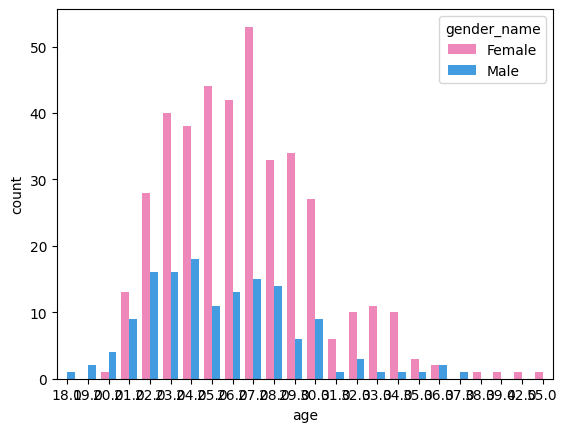

In [98]:
# grouped barplot showin number of men and women in the study per age
sns.countplot(data = dating_per_person, x = "age", hue = "gender_name", width = 0.75, palette=gender_palette)

<AxesSubplot: xlabel='age', ylabel='Count'>

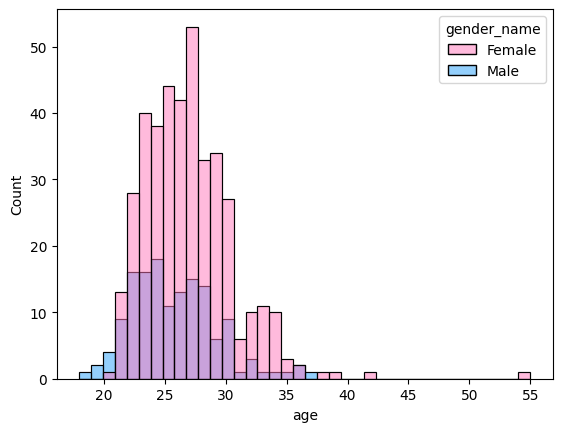

In [127]:
sns.histplot(data=dating_per_person, x="age", hue="gender_name", stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=gender_palette, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None)

In [ ]:
sns.barplot(x = tips_df.day, y = tips_df.total_bill, hue = tips_df.sex)

Let's explore motivation for dating for men and women who participated in the study.
As the goals in the dataset are coded with numbers, let's create an additional column that will describe the goal explicitly according to the dataset key.

In [ ]:
dating_per_person['goal_name'] = dating_per_person["goal"].apply(lambda x: "Seemed like a fun night out" if x == 1 else "To meet new people" if x == 2 else "To get a date" if x == 3 else "Looking for a serious relationship" if x == 4 else "To say I did it" if x==5 else "Other" if x==6 else None)
#dating_per_person.head(15)

Let's represent different goals by a separate pie chart for both genders.

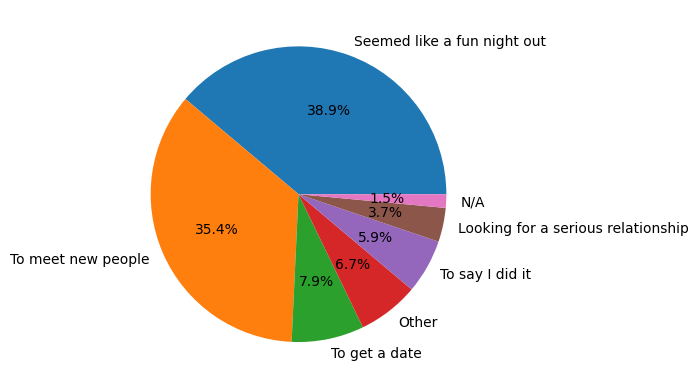

In [120]:
dating_females = dating_per_person.loc[dating_per_person['gender_name'] == 'Female']
#display(dating_females.head())
females_by_goal = dating_females["goal_name"].value_counts(dropna=False)
#display(females_by_goal)

females_by_goal_array = females_by_goal.to_numpy()


labels = 'Seemed like a fun night out', 'To meet new people', 'To get a date', 'Other', 'To say I did it', 'Looking for a serious relationship', 'N/A'
sizes = females_by_goal_array

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
#plt.legend(bbox_to_anchor=(1, 1))

plt.show()


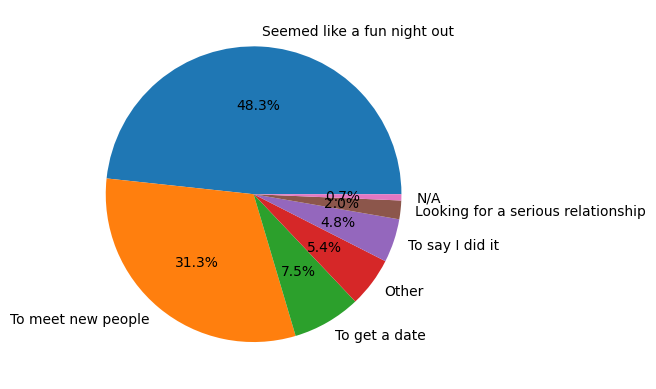

In [121]:
dating_males = dating_per_person.loc[dating_per_person['gender_name'] == 'Male']
#display(dating_males.head())
males_by_goal = dating_males["goal_name"].value_counts(dropna=False)
#display(males_by_goal)

males_by_goal_array = males_by_goal.to_numpy()

labels = 'Seemed like a fun night out', 'To meet new people', 'To get a date', 'Other', 'To say I did it', 'Looking for a serious relationship', 'N/A'
sizes = males_by_goal_array

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
#plt.legend(bbox_to_anchor=(1, 1))

plt.show()


In [ ]:
import numpy as np
females_by_goal_array = females_by_goal.to_numpy()

labels = 'Seemed like a fun night out', 'To meet new people', 'To get a date', 'Other', 'To say I did it', 'Looking for a serious relationship', 'N/A'
sizes = females_by_goal_array

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1, 1))


plt.show()

In [ ]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()

In [ ]:
#dating_per_person['note_method'] = dating_per_person["wave"].apply(lambda x: '10_scale' if x == 6.0 or 7.0 or 8.0 or 9.0 else "100_point_alloc")
dating_per_person['note_method'] = dating_per_person["wave"].apply(lambda x: '10_scale' if x == 6 or x == 7 or x == 8 or x == 9 else "100_point_alloc")

In [ ]:
dating_per_person.head()

In [ ]:
dating_per_person_10_scale_mask = dating_per_person["note_method"]=="10_scale"
dating_per_person_10_scale = dating_per_person[dating_per_person_10_scale_mask].reset_index(drop=False)
dating_per_person_10_scale.head()

In [ ]:
dating_per_person_100_point_mask = dating_per_person["note_method"]=="100_point_alloc"
dating_per_person_100_point = dating_per_person[dating_per_person_100_point_mask].reset_index(drop=False)
dating_per_person_100_point.head()

In [ ]:
# creating a dataframe that contaings estimates of criteria that are important in opposite sex:
dating_per_person_100_point = dating_per_person_100_point.groupby("gender_name").mean().reset_index(drop=False)
dating_per_person_100_point_by_gender = dating_per_person_100_point[["gender_name",'iid', 'match', 'attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr1_s', 'sinc1_s',
       'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2',
       'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3']]
dating_per_person_100_point_by_gender

In [ ]:
a = 23.737295 + 17.284344 + 20.490410 + 17.266721 + 10.174208 + 11.235574
print(a)